https://www.tensorflow.org/tutorials/load_data/images

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


In [13]:
BATCH_SIZE = 10
IMG_HEIGHT = 400
IMG_WIDTH = 400


In [14]:
train_data_gen = image_generator.flow_from_directory(directory='training',
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))


Found 200 images belonging to 2 classes.


In [9]:
type(train_data_gen)

keras_preprocessing.image.directory_iterator.DirectoryIterator

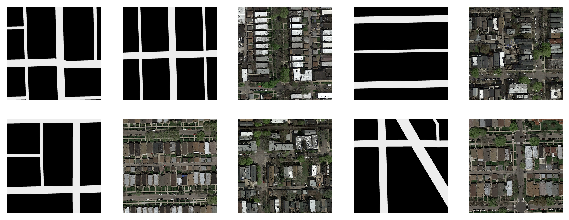

In [15]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)


# With tf.data

In [21]:
list_ds = tf.data.Dataset.list_files('training/images/*')
for f in list_ds.take(5):
  print(f.numpy())


b'training/images/satImage_022.png'
b'training/images/satImage_049.png'
b'training/images/satImage_041.png'
b'training/images/satImage_093.png'
b'training/images/satImage_090.png'


In [63]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_png(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def get_label(file_path):
  mask_path = tf.strings.regex_replace(file_path, 'images', 'groundtruth')
  img = tf.io.read_file(mask_path)
  img = decode_img(img)
  return img

def process_path(file_path):
  #label = get_label(file_path)
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label


In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [64]:
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)


In [66]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy().shape)


Image shape:  (400, 400, 3)
Label:  (400, 400, 3)
